# Explain in your own words what effect does the choice of Covariance matrix have on the Bivariate Gaussian (compare spherical, elliptical). What does it mean when the covariance matrix is not diagonal? 
A bivariate normal distribution is made up of two independent random variables. The two variables in a bivariate normal are both are normally distributed, and they have a normal distribution when both are added together. Visually, the bivariate normal distribution is a three-dimensional bell curve.
Covariance is actually the critical part in multivariate Gaussian distribution. The two major properties of the covariance matrix are:
<p>Covariance matrix is positive semi-definite </p>
<p> Covariance matrix in multivariate Gaussian distribution is positive definite</p>
This is the pdf of Bivariate Normal Distribution:

$$
f(x,y)=\frac{\exp \left\{ -\frac 1{2(1-\rho ^2)}\left[ \left( \frac{x-\mu _x%
}{\sigma _x}\right) ^2-2\rho \left( \frac{x-\mu _x}{\sigma _x}\right) \left(
\frac{y-\mu _y}{\sigma _y}\right) +\left( \frac{y-\mu _y}{\sigma _y}\right)
^2\right] \right\} }{2\pi \sigma _x\sigma _y\sqrt{1-\rho ^2}}
$$
where
 $(\mu _x,\mu _y)$ 
 is the mean vector and the variance-covariance matrix is
$$\begin{array}{cc}
Var(X) &amp; Cov(X,Y) \\
Cov(X,Y) &amp; Var(Y)
\end{array}$$$$\begin{array}{cc}
\sigma _x^2 &amp; \rho \sigma _x\sigma _y \\
\rho \sigma _x\sigma _y &amp; \sigma _y^2
\end{array}$$

Means of random variable specify only the centre of the distribution that display highest probability of the distribution


A matrix A is considered diagonal if
$A_{ij}$=0
whenever i≠j.
However, this condition has special interpretations in the context of a covariance matrix.
If X is a random vector. The covariance matrix of X is defined as
$$\sum = E\left[(X−E[X])(X−E[X])^⊤\right]$$
This means that
$$\sum_{ij}=Cov(X_i,X_j)$$
So if $\sum$ is diagonal, then
$$Cov(X_i,X_j)=0$$  for all i≠j
which means that the entries of X are uncorrelated.
if the covariance matrix is not diagonal, it means variables are dependent on eachother and there is a positive or negative corelation between $X_i$ $X_j$.
Every covariance matrix is diagonal with respect to the right basis. It might just be that the data we have is not given in that basis. In other words, the data doesn’t coincide with the eigenvectors of the covariance matrix.
We can simply interpret it as, there is no LINEAR relationship exists between variables, because off diagonal elements of a covariance matrix gives you the covariance between variables.
If the covariance is zero then essentially your measure of linear relationship (correlation) also zero.


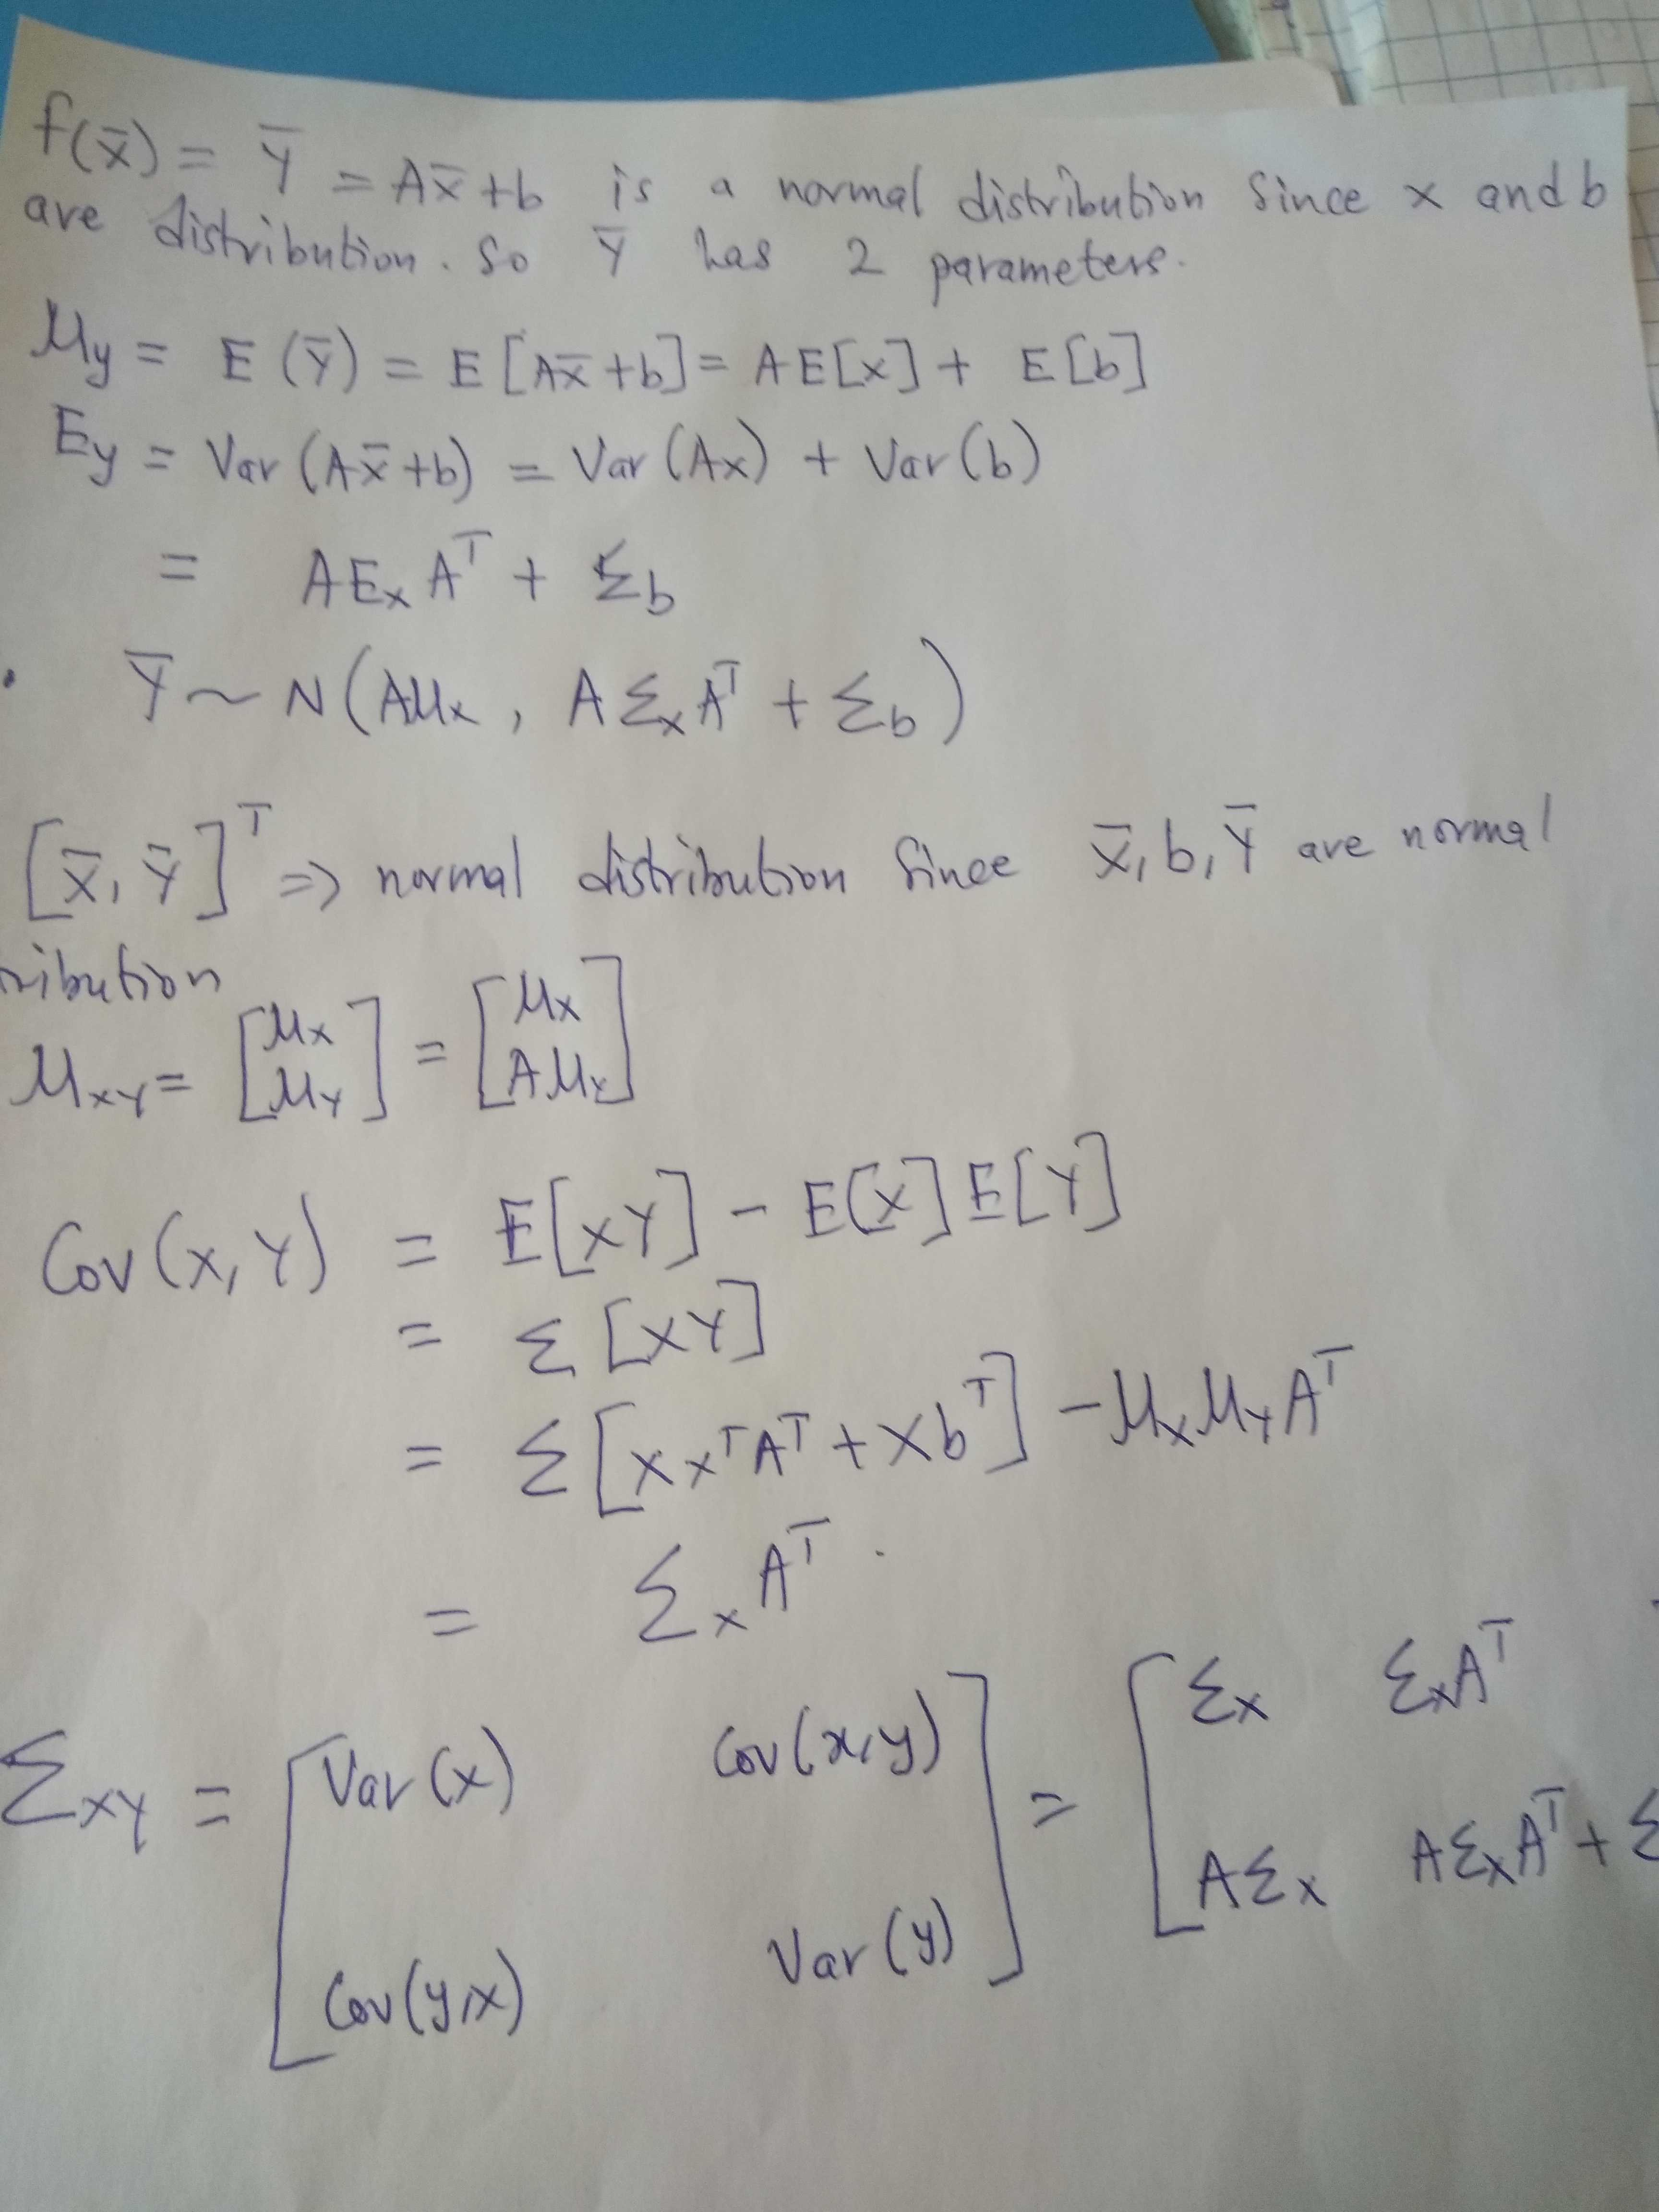

In [3]:
from IPython.display import Image
Image(r"C:\Users\minds\Downloads\2.jpg")

# 3. What is the meaning of Mahalanobis distance? What is the relation of this to the eigenvalues of the Covariance matrix? Draw a sketch either in Python or by hand for the Bivariate case (K=2)


## Mahalanobis distance
The Mahalanobis distance (MD) is the distance between two points in multivariate space. In a regular Euclidean space, variables (e.g. x, y, z) are represented by axes drawn at right angles to each other; The distance between any two points can be measured with a ruler. For uncorrelated variables, the Euclidean distance equals the MD. However, if two or more variables are correlated, the axes are no longer at right angles, and the measurements become impossible with a ruler. In addition, if you have more than three variables, you can’t plot them in regular 3D space at all. The MD solves this measurement problem, as it measures distances between points, even correlated points for multiple variables.
$$ D_M^2 = (x_B – x_A)^T * C^{-1} * (x_B – x_A)$$
## relation between eigenvalues of the covariance
One of the most intuitive explanations of eigenvectors of a covariance matrix is that they are the directions in which the data varies the most. The Eigenvector which corresponds to the maximum Eigenvalue of the Covariance matrix, C, will be the direction along which the dataset has the most information, i.e., the largest eigenvector of C corresponds to the principal component of the data.
If the covariances are zero, then the eigenvalues are equal to the variances:
If the covariance matrix not diagonal, the eigenvalues represent the variance along the principal components, whereas the covariance matrix still operates along the axes:

In [73]:
%matplotlib notebook

import sys
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from matplotlib import cm # Colormaps
import matplotlib.gridspec as gridspec
from mpl_toolkits.axes_grid1 import make_axes_locatable
import seaborn as sns

sns.set_style('darkgrid')
np.random.seed(42)

In [22]:
def multivariate_normal(x, d, mean, covariance):
    """pdf of the multivariate normal distribution."""
    x_m = x - mean
    return (1. / (np.sqrt((2 * np.pi)**d * np.linalg.det(covariance))) * 
            np.exp(-(np.linalg.solve(covariance, x_m).T.dot(x_m)) / 2))

In [40]:
def generate_surface(mean,covariance,d):
    nb_of_x=100 #grid size
    x1s=np.linspace(-5,5,num=nb_of_x)
    x2s=np.linspace(-5,5,num=nb_of_x)
    x1,x2=np.meshgrid(x1s,x2s) #generate grid
    pdf=np.zeros((nb_of_x,nb_of_x))
    for i in range(nb_of_x):
        for j in range(nb_of_x):
            pdf[i,j]=multivariate_normal(np.matrix([[x1[i,j]],[x2[i,j]]]),
                                        d,mean,covariance)
    return x1,x2,pdf
    

In [74]:
#sample form:
d=2 #number of dimension
mean = np.matrix([[0.], [1.]])
covariance = np.matrix([
    [1, 0.8], 
    [0.8, 1]
])
L=np.linalg.cholesky(covariance)
n=50 #sample to draw
x=np.random.normal(size=(d,n))
#apppy a Transformation
Y=L.dot(x)+mean

In [75]:
Y

matrix([[ 0.49671415, -0.1382643 ,  0.64768854,  1.52302986, -0.23415337,
         -0.23413696,  1.57921282,  0.76743473, -0.46947439,  0.54256004,
         -0.46341769, -0.46572975,  0.24196227, -1.91328024, -1.72491783,
         -0.56228753, -1.01283112,  0.31424733, -0.90802408, -1.4123037 ,
          1.46564877, -0.2257763 ,  0.0675282 , -1.42474819, -0.54438272,
          0.11092259, -1.15099358,  0.37569802, -0.60063869, -0.29169375,
         -0.60170661,  1.85227818, -0.01349722, -1.05771093,  0.82254491,
         -1.22084365,  0.2088636 , -1.95967012, -1.32818605,  0.19686124,
          0.73846658,  0.17136828, -0.11564828, -0.3011037 , -1.47852199,
         -0.71984421, -0.46063877,  1.05712223,  0.34361829, -1.76304016],
        [ 1.5918217 ,  0.65833919,  1.11199763,  2.58542966,  1.43127701,
          1.37145851,  1.75983974,  1.42842036,  0.82317855,  2.01937511,
          0.3417613 ,  0.51602081,  0.52976883, -1.24834817,  0.10758123,
          1.36391399,  0.14652903,  1

<IPython.core.display.Javascript object>


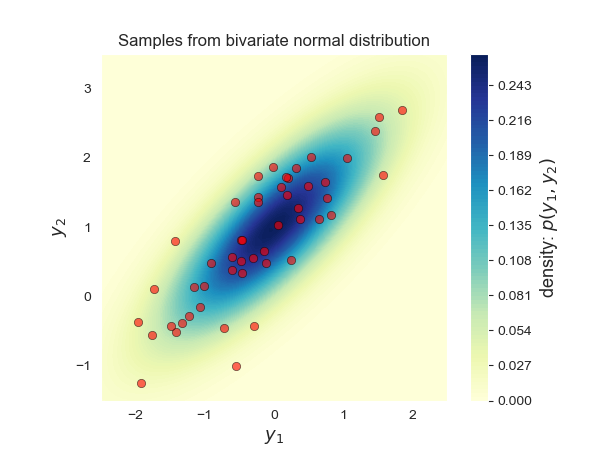

In [78]:
fig,ax=plt.subplots(figsize=(6,4.5))
#plot a bivariate distribution
x1,x2,p=generate_surface(mean,covariance,d)
con = ax.contourf(x1, x2, p, 100, cmap=cm.YlGnBu)
# Plot samples
ax.plot(Y[0,:], Y[1,:], 'ro', alpha=.6,
        markeredgecolor='k', markeredgewidth=0.5)
ax.set_xlabel('$y_1$', fontsize=13)
ax.set_ylabel('$y_2$', fontsize=13)
ax.axis([-2.5, 2.5, -1.5, 3.5])
ax.set_aspect('equal')
ax.set_title('Samples from bivariate normal distribution')
cbar = plt.colorbar(con)
cbar.ax.set_ylabel('density: $p(y_1, y_2)$', fontsize=13)
plt.show()